# MNIST digits

Training NN for image recognition of digits. 

# Import

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

from tensorflow.keras.utils import to_categorical
#import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


# Load data

As an alternative, we can load the MNIST dataset from the following source:

```py
import mnist

x_train, y_train = mnist.train_images(), mnist.train_labels()
x_test, y_test = mnist.test_images(), mnist.test_labels()
```

Subsequently, it would have had to be processed in the way identical to the one described in this notebook (i.e., reshape, normalize by dividing by 256)

In [165]:
# Get the data
# TRAIN-TEST split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f"Size of the training set: {len(x_train):,}")
print(f"Size of the testing set: {len(x_test):,}")

Size of the training set: 60,000
Size of the testing set: 10,000


In [166]:
# Our features are matrices representing 28x28 images, 
# with each pixel representing black-white pixel with intensity 0-255
# Let's check one of the images' dimensions:
print( x_train[1].shape )
x_train[1]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [167]:
# Labels:
print( y_train[:10] )
print( y_train[0] )
print( y_train[0].shape )
y_train[0]

[5 0 4 1 9 2 1 3 1 4]
5
()


5

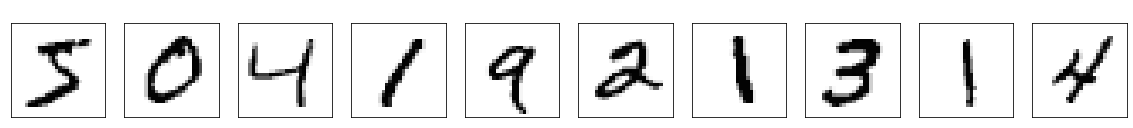

In [168]:
fig = plt.figure(figsize=(20,20))
number = 10
for i in range(number):
	ax = fig.add_subplot(1, number, i+1, xticks=[], yticks=[])
	ax.imshow(x_train[i], cmap='Greys')
	ax.set_title(f'Label: {str(y_train[i])}', color='white')


# Pre-processing

In [169]:
# First, let's reshape the features.
# Right now, they are in the form of numpy matrix (28*28)
# Let's reshape it to a 28*28=784 -long array
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
(x_train[0].shape) # a 28*28 matrix becomes a 784-long array

x_train = x_train / 256
x_test = x_test / 256
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [170]:
print("Features")
print(type(x_train))
print(x_train.shape)

Features
<class 'numpy.ndarray'>
(60000, 784)


In [171]:
y_train
type(y_train)

numpy.ndarray

In [172]:
# Process labels as per the special requirements of Tensorflow, 
# to accommodate for 10 features

for i in range(3):
	print(f"Before: {y_train[i]} | shape: {y_train[i].shape}")

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


for i in range(3):
	print(f"After: {y_train[i]} | shape: {y_train[i].shape}")

Before: 5 | shape: ()
Before: 0 | shape: ()
Before: 4 | shape: ()
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] | shape: (10,)
After: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] | shape: (10,)


# Train model 1 - Keras (tensorflow)

In [173]:
# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax')) # Output layer

# Compiling the model
model.compile(
	loss = 'categorical_crossentropy', 
	optimizer='adam', 
	metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.fit( x_train, y_train, epochs=15, batch_size=10 )

Epoch 1/15
6000/6000 [==============================] - 9s 1ms/step - loss: 0.2882 - accuracy: 0.9140
Epoch 2/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.1537 - accuracy: 0.9539
Epoch 3/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.1242 - accuracy: 0.9622
Epoch 4/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.1091 - accuracy: 0.9679
Epoch 5/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0997 - accuracy: 0.9710
Epoch 6/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0902 - accuracy: 0.9723
Epoch 7/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0829 - accuracy: 0.9752
Epoch 8/15
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0816 - accuracy: 0.9758
Epoch 9/15
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0744 - accuracy: 0.9771
Epoch 10/15
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0

## Test

In [175]:
print(x_test.shape)

(10000, 784)


313/313 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9797
Test loss: 0.09
Test accuracy: 0.98
313/313 [==============================] - 0s 1ms/step


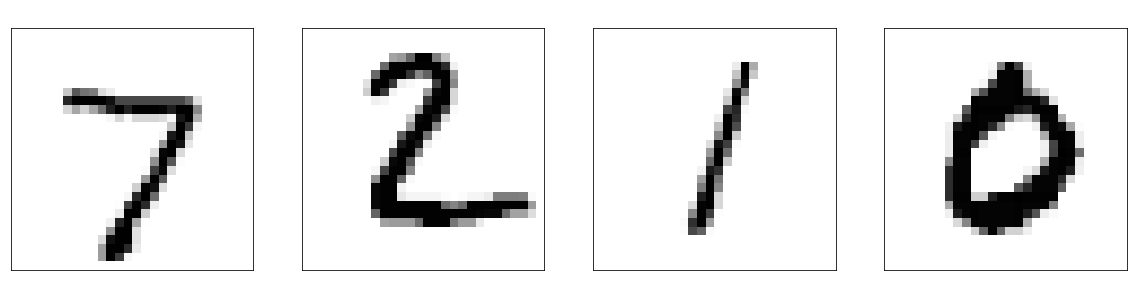

In [176]:
# Check overall accuracy on the test set
score = model.evaluate( x_test, y_test )
print(f"Test loss: {score[0]:.2f}")
print(f"Test accuracy: {score[1]:.2f}")

# Let us also check some individual predictions and their accuracy
predictions_vector = model.predict(x_test)
predictions = [ np.argmax(i) for i in predictions_vector ]

fig = plt.figure(figsize=(20,20))
number = 4
for i in range(number):
	fig.add_subplot(1, number, i+1, xticks=[], yticks=[])
	plot = x_test[i].reshape(28,28)
	plt.imshow(plot, cmap='Greys')
	plt.title(f'Label: {np.argmax(y_test[i])} | prediction: {predictions[i]}', color='white', size=20)

In [177]:
# # We can also load some custom images to test

# def read_image(file_path):
# 	img = Image.open(file_path)
# 	# Convert to the "L" color mode
# 	img = img.convert("L")
# 	# Resize, in case the original image isn't 28*28
# 	img = img.resize((28,28))
# 	data = list(img.getdata())
# 	# An array of intensity (up to 255)
# 	# This is to invert the color intensity, i.e. to make 0 the least intense (white)
# 	for i in range(len(data)):
# 		data[i] = 255 - data[i]
# 	# Normalisation - make them in the range 0-1
# 	data = [data]
# 	data = np.array(data)/256
# 	return data


# fig = plt.figure(figsize=(20,20))
# for h, i in enumerate(['five (2)', 'five', 'one', 'two', 'four']):
# 	a = read_image(f"example_datasets/Digit_{i}.png")
# 	predictions_vector = model.predict(a)
# 	predictions = [np.argmax(pred) for pred in predictions_vector]
# 	fig.add_subplot(1, 5, h+1, xticks=[], yticks=[])
# 	plot = a.reshape(28,28)
# 	plt.imshow(plot, cmap='Greys')
# 	plt.title(f'Label: {i}\nprediction: {predictions}', color='white', size=20)

1/1 [==============================] - 0s 18ms/step
1_1.png
Label: 1 | prediction: [1]


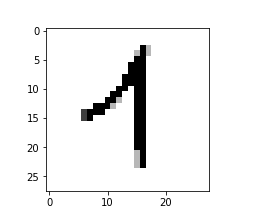

1/1 [==============================] - 0s 18ms/step
1_2.png
Label: 1 | prediction: [3]


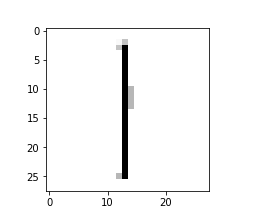

1/1 [==============================] - 0s 16ms/step
Digit_one.png
Label: 1 | prediction: [7]


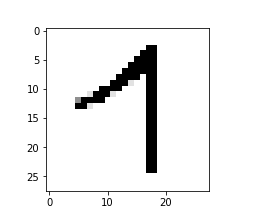

1/1 [==============================] - 0s 16ms/step
2_1.png
Label: 2 | prediction: [2]


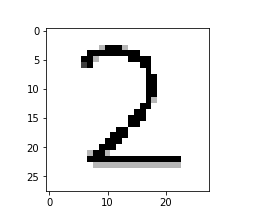

1/1 [==============================] - 0s 20ms/step
Digit_two.png
Label: 2 | prediction: [2]


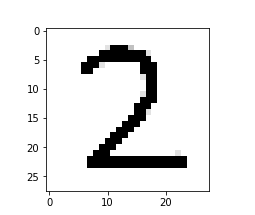

1/1 [==============================] - 0s 18ms/step
3_1.png
Label: 3 | prediction: [3]


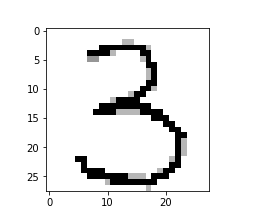

1/1 [==============================] - 0s 16ms/step
Digit_four.png
Label: 4 | prediction: [4]


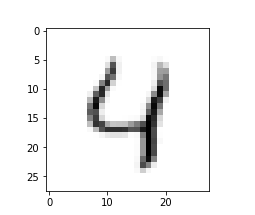

1/1 [==============================] - 0s 16ms/step
Digit_five (2).png
Label: 5 | prediction: [5]


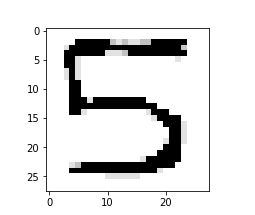

1/1 [==============================] - 0s 18ms/step
Digit_five.png
Label: 5 | prediction: [5]


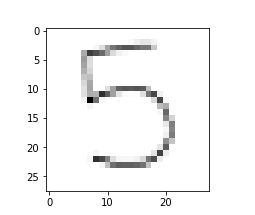

In [178]:
def read_image(file_path):
	""" Read one image from a path """
	img = Image.open(file_path)
	img = img.convert("L")
	img = img.resize((28,28))
	data = list(img.getdata())
	for i in range(len(data)):
		data[i] = 255 - data[i]
	data = [data]
	data = np.array(data)/256
	return data

folders = os.listdir('Media/Test')
number = 9; counter = 1
# fig = plt.figure(figsize=(20,20))
for i in folders:
	images = os.listdir(f"Media/Test/{i}")
	for j in images:
		# Prediction
		image_data = read_image(f"Media/Test/{i}/{j}")
		predictions_vector = model.predict(image_data)
		predictions = [ np.argmax(i) for i in predictions_vector ]
		predictions
		print(j)
		print(f"Label: {i} | prediction: {predictions}")
		# Graph
		# fig.add_subplot(1, number, counter, xticks=[], yticks=[])
		plt.figure(figsize=(3,3))
		plot = image_data.reshape(28,28)
		plt.imshow(plot, cmap='Greys')
		plt.title(f'Label: {i} | prediction: {predictions}', color='white', size=20)
		plt.show()
		counter += 1

# Train model 2 - Sklearn

The Sklearn NN will have the following properties:
- 28px * 28px = 784 neurons (input layer)

In [179]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train = x_train / 256
x_test = x_test / 256

In [180]:
# Let's start with the already pre-processed x_train, y_train

clf = MLPClassifier(
	solver='adam', 
	activation='relu', 
	hidden_layer_sizes=(64,64)) # two hidden layers 64x64; can also be 1 hidden layer with 50 neurons = (50,)

clf.fit(x_train, y_train)



MLPClassifier(hidden_layer_sizes=(64, 64))

Accuracy: [[ 969    0    1    1    0    0    3    0    4    2]
 [   0 1124    3    2    0    0    2    1    3    0]
 [   3    1 1007    3    3    0    2    5    8    0]
 [   0    0    3  987    0    6    0    5    5    4]
 [   1    0    4    1  960    0    4    2    0   10]
 [   2    0    0    4    2  869    8    1    3    3]
 [   4    3    1    1    5    5  937    0    2    0]
 [   2    4    8    4    1    0    0  998    6    5]
 [   3    1    2    8    6    2    6    2  939    5]
 [   2    3    0    7    8    2    1    5    3  978]]


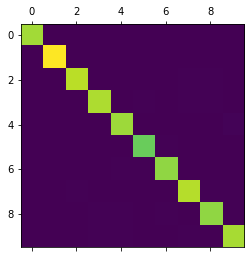

In [181]:
prediction = clf.predict(x_test)
acc = confusion_matrix(y_test, prediction)
print(f"Accuracy: {acc}")
plt.matshow(acc)

In [182]:
print(f"Training set score: {clf.score(x_train, y_train)}")
print(f"Test set score: {clf.score(x_test, y_test)}")

Training set score: 1.0
Test set score: 0.9768


In [183]:
# Alternatively, we can calculate the accuracy from the confusion matrix
def accuracy(cm):
	diagonal = cm.trace()
	elements = cm.sum()
	return diagonal / elements

print(accuracy(acc))

0.9768


1_1.png
Label: 1 | prediction: [1]


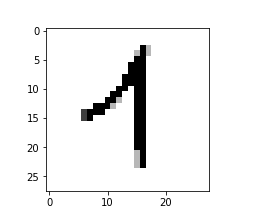

1_2.png
Label: 1 | prediction: [1]


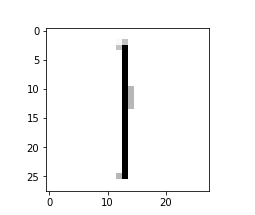

Digit_one.png
Label: 1 | prediction: [2]


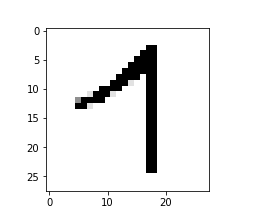

2_1.png
Label: 2 | prediction: [2]


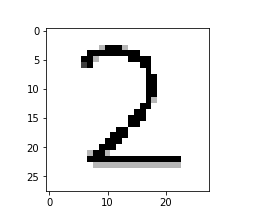

Digit_two.png
Label: 2 | prediction: [2]


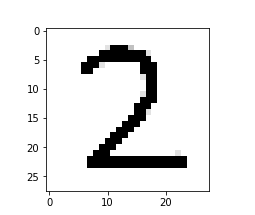

3_1.png
Label: 3 | prediction: [3]


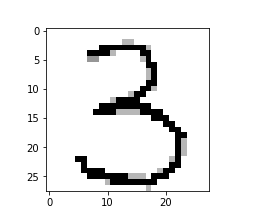

Digit_four.png
Label: 4 | prediction: [4]


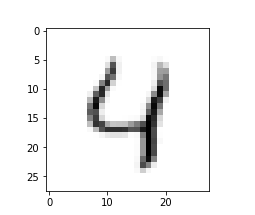

Digit_five (2).png
Label: 5 | prediction: [5]


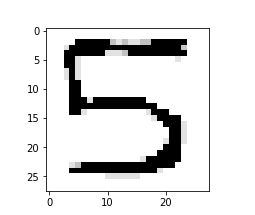

Digit_five.png
Label: 5 | prediction: [5]


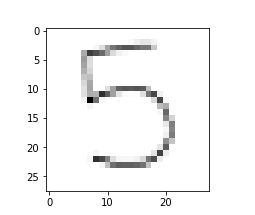

In [184]:
def read_image(file_path):
	""" Read one image from a path """
	img = Image.open(file_path)
	img = img.convert("L")
	img = img.resize((28,28))
	data = list(img.getdata())
	for i in range(len(data)):
		data[i] = 255 - data[i]
	data = [data]
	data = np.array(data)/256
	return data

folders = os.listdir('Media/Test')
number = 9; counter = 1
# fig = plt.figure(figsize=(20,20))
for i in folders:
	images = os.listdir(f"Media/Test/{i}")
	for j in images:
		# Prediction
		image_data = read_image(f"Media/Test/{i}/{j}")
		# predictions_vector = model.predict(image_data)
		# predictions = [ np.argmax(i) for i in predictions_vector ]
		predictions = clf.predict(image_data)
		print(j)
		print(f"Label: {i} | prediction: {predictions}")
		# Graph
		# fig.add_subplot(1, number, counter, xticks=[], yticks=[])
		plt.figure(figsize=(3,3))
		plot = image_data.reshape(28,28)
		plt.imshow(plot, cmap='Greys')
		plt.title(f'Label: {i} | prediction: {predictions}', color='white', size=20)
		plt.show()
		counter += 1

# 2 - Starting with custom data

White background, black digit.

## Load data

In [3]:
def read_image(file_path):
	""" Read one image from a path """
	img = Image.open(file_path)
	img = img.convert("L")
	img = img.resize((28,28))
	data = list(img.getdata())
	for i in range(len(data)):
		data[i] = 255 - data[i]
	data = [data]
	data = np.array(data)/256
	return data

folders = os.listdir('Media/Train')
print(f"Labels to train: {folders}")

y_total = []
x_total = []

for i in folders:
	images = os.listdir(f"Media/Train/{i}")
	for j in images:
		# Add labels
		y_total.append(int(i))
		# print(j)
		image_data = read_image(f"Media/Train/{i}/{j}")
		x_total.append(image_data)

y_total = np.array(y_total)
x_total = np.array(x_total)
x_total = np.squeeze(x_total)
print('LABELS:')
print(type(y_total))
print(y_total)
print('FEATURES:')
print(type(x_total))
print(f"Shape: {x_total.shape}")
print(x_total[1])

Labels to train: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
LABELS:
<class 'numpy.ndarray'>
[0 0 0 1 1 1 1 1 1 2 2 2 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 7 7 7 7 7 7 8 8 8 8
 9 9 9 9]
FEATURES:
<class 'numpy.ndarray'>
Shape: (41, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Pre-processing

In [5]:
# Process labels as per the special requirements of Tensorflow, 
# to accommodate for 10 features

for i in range(9):
	print(f"Before: {y_total[i]} | shape: {y_total[i].shape}")

y_total = to_categorical(y_total, 10)

for i in range(9):
	print(f"After: {y_total[i]} | shape: {y_total[i].shape}")

Before: 0 | shape: ()
Before: 0 | shape: ()
Before: 0 | shape: ()
Before: 1 | shape: ()
Before: 1 | shape: ()
Before: 1 | shape: ()
Before: 1 | shape: ()
Before: 1 | shape: ()
Before: 1 | shape: ()
After: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)


## Train

In [7]:
# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,))) # 28*28=784
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax')) # Output layer

# Compiling the model
model.compile(
	loss = 'categorical_crossentropy', 
	optimizer='adam', 
	metrics=['accuracy'])
model.summary()

model.fit( x_total, y_total, epochs=15, batch_size=10 )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
5/5 [==============================] 

## Test

1/1 [==============================] - 0s 84ms/step
1_1.png
Label: 1 | prediction: [1]


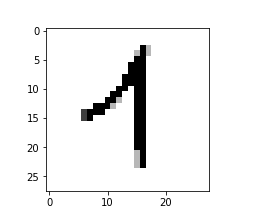

1/1 [==============================] - 0s 21ms/step
1_2.png
Label: 1 | prediction: [1]


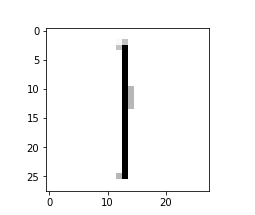

1/1 [==============================] - 0s 21ms/step
Digit_one.png
Label: 1 | prediction: [4]


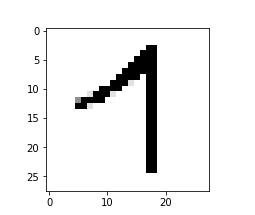

1/1 [==============================] - 0s 24ms/step
2_1.png
Label: 2 | prediction: [2]


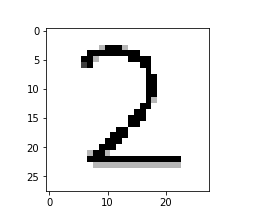

1/1 [==============================] - 0s 21ms/step
Digit_two.png
Label: 2 | prediction: [2]


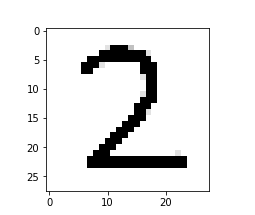

1/1 [==============================] - 0s 21ms/step
3_1.png
Label: 3 | prediction: [8]


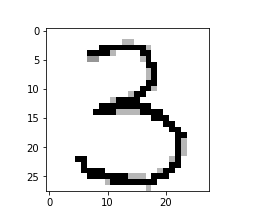

1/1 [==============================] - 0s 24ms/step
Digit_four.png
Label: 4 | prediction: [6]


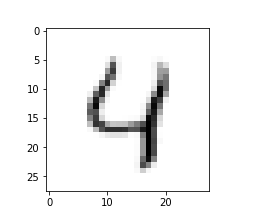

1/1 [==============================] - 0s 20ms/step
Digit_five (2).png
Label: 5 | prediction: [5]


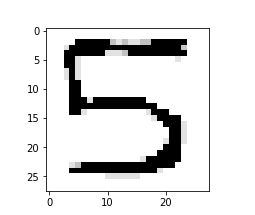

1/1 [==============================] - 0s 29ms/step
Digit_five.png
Label: 5 | prediction: [3]


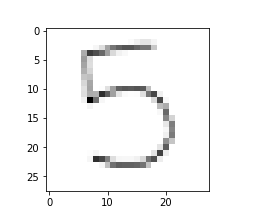

In [8]:
def read_image(file_path):
	""" Read one image from a path """
	img = Image.open(file_path)
	img = img.convert("L")
	img = img.resize((28,28))
	data = list(img.getdata())
	for i in range(len(data)):
		data[i] = 255 - data[i]
	data = [data]
	data = np.array(data)/256
	return data

folders = os.listdir('Media/Test')
number = 9; counter = 1
# fig = plt.figure(figsize=(20,20))
for i in folders:
	images = os.listdir(f"Media/Test/{i}")
	for j in images:
		# Prediction
		image_data = read_image(f"Media/Test/{i}/{j}")
		predictions_vector = model.predict(image_data)
		predictions = [ np.argmax(i) for i in predictions_vector ]
		predictions
		print(j)
		print(f"Label: {i} | prediction: {predictions}")
		# Graph
		# fig.add_subplot(1, number, counter, xticks=[], yticks=[])
		plt.figure(figsize=(3,3))
		plot = image_data.reshape(28,28)
		plt.imshow(plot, cmap='Greys')
		plt.title(f'Label: {i} | prediction: {predictions}', color='white', size=20)
		plt.show()
		counter += 1

